In [3]:
from google.colab import drive
drive.mount('/content/drive')

%cd ./drive/MyDrive/GitHub/fsdl-text-recognizer-project

!pip install -r requirements.txt -r requirements-dev.txt
!export PYTHONPATH=.

Mounted at /content/drive
/content/drive/MyDrive/GitHub/fsdl-text-recognizer-project
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 KB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.7/168.7 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.0/156.0 KB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/5

In [7]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('./lab1')

from text_recognizer.datasets.emnist_dataset import EmnistDataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
dataset = EmnistDataset(subsample_fraction=0.25)
dataset.load_or_generate_data()
print(dataset)
print(dataset.x_train.shape, dataset.y_train.shape)
print(dataset.x_test.shape, dataset.y_test.shape)

0.00B [00:00, ?B/s]

709MB [00:12, 60.3MB/s]                           


Computing SHA-256...
Unzipping EMNIST...
Loading training data from .mat file
Balancing classes to reduce amount of data
Saving to HDF5 in a compressed format...
Saving essential dataset parameters to text_recognizer/datasets...
Cleaning up...
EMNIST Dataset
Num classes: 80
Mapping: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z', 62: ' ', 63: '!', 64: '"', 65: '#', 66: '&', 67: "'", 68: '(', 69: ')', 70: '*', 71: '+', 72: ',', 73: '-', 74: '.', 75: '/', 76: ':', 77: ';', 78: '?', 79: '_'}
Input

In [ ]:
from text_recognizer.networks.lenet import lenet

network = lenet(dataset.input_shape, output_shape=(dataset.num_classes, 1))
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
expand_dims (Lambda)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [ ]:
network.compile(optimizer='sgd', loss='categorical_crossentropy', metrics='accuracy')
network.fit(
    x=dataset.x_train,
    y=dataset.y_train,
    batch_size=64,
    epochs=5,
    validation_data=(dataset.x_test, dataset.y_test)
)

Epoch 1/5
1314/1314 [==============================] - 20s 15ms/step - loss: 0.2816 - accuracy: 0.9345 - val_loss: 0.0562 - val_accuracy: 0.9833
Epoch 2/5
1314/1314 [==============================] - 6s 4ms/step - loss: 0.0662 - accuracy: 0.9804 - val_loss: 0.0365 - val_accuracy: 0.9889
Epoch 3/5
1314/1314 [==============================] - 6s 4ms/step - loss: 0.0466 - accuracy: 0.9860 - val_loss: 0.0352 - val_accuracy: 0.9905
Epoch 4/5
1314/1314 [==============================] - 6s 4ms/step - loss: 0.0373 - accuracy: 0.9889 - val_loss: 0.0292 - val_accuracy: 0.9915
Epoch 5/5
1314/1314 [==============================] - 6s 4ms/step - loss: 0.0289 - accuracy: 0.9910 - val_loss: 0.0306 - val_accuracy: 0.9916


(1, 28, 28, 1)
[[9.99999881e-01 8.04929214e-12 7.04592438e-08 1.50007502e-12
  2.19322199e-11 1.06680595e-10 1.00794795e-09 1.53098159e-11
  1.44311104e-13 2.55953690e-16 7.89550852e-14 4.83885994e-15
  1.83673610e-15 6.49945048e-18 5.02020758e-16 5.86758376e-12
  1.82197581e-16 8.72858219e-15 1.71123361e-18 9.04258917e-16
  1.90967135e-14 2.65879655e-17 6.61706321e-16 2.67261456e-18
  2.62863665e-14 3.56004904e-17 2.56579595e-14 7.47674977e-16
  6.07827336e-17 2.06184588e-16 2.58166172e-14 1.26347041e-18
  2.54738192e-15 3.23505943e-19 2.34137969e-11 1.45513349e-14
  1.71233809e-13 2.57681849e-16 1.28874049e-12 5.36686682e-15
  4.88973393e-17 1.05590820e-15 2.28668360e-15 8.28977197e-19
  2.82996537e-14 1.03052781e-15 2.33458899e-14 2.41450066e-15
  7.87818991e-15 1.53353580e-11 4.72213093e-17 1.79844153e-17
  1.31031984e-15 1.16631834e-12 7.82538006e-16 1.11099817e-15
  1.69132320e-14 8.32786933e-19 8.21636186e-17 2.01583333e-11
  7.76110720e-16 2.75385454e-20 1.01259130e-14 6.193426

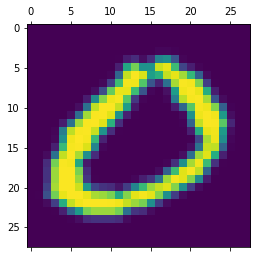

In [ ]:
x_example = dataset.x_test[0:1]
plt.matshow(x_example[0])

x_example = np.expand_dims(x_example, -1)
print(x_example.shape)
preds = network.predict(x_example)
print(preds)

ind = np.argmax(preds)
print(ind)

print(dataset.mapping[ind])